In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
# Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
data_measurement = engine.execute("SELECT * FROM measurement")
    
# Query All Records in the the measurement
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
# DataFrame column type check
measurement_df.dtypes

id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [11]:
# Query All Records in the the station
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [12]:
# DataFrame column type check
station_df.dtypes

id             int64
station       object
name          object
latitude     float64
longitude    float64
elevation    float64
dtype: object

In [13]:
# Merge the dataFrames
combined_data = pd.merge(measurement_df, station_df, on="station", how="inner")
del combined_data['id_x']
del combined_data['id_y']
combined_data.head()

,station,date,prcp,tobs,name,latitude,longitude,elevation
0,USC00519397,2010-01-01,0.08,65.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00519397,2010-01-02,0.00,63.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,USC00519397,2010-01-03,0.00,74.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,USC00519397,2010-01-04,0.00,76.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,USC00519397,2010-01-06,NaN,73.0,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

last_date

'2017-08-23'

In [17]:
# First Date
first_date = session.query(Measurement.date).order_by(Measurement.date).first().date
first_date

'2010-01-01'

In [18]:
from datetime import datetime, timedelta

date_365_days_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
date_365_days_ago



datetime.datetime(2016, 8, 23, 0, 0)

In [19]:
# Selecting last 1 year using session.query 
# Perform a query to retrieve the data and precipitation scores
q12 = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= date_365_days_ago).all()
q12

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df_q12 = pd.DataFrame(q12, columns=['date', 'precipitation'])
df_q12 = df_q12.dropna()
# df_q12.shape
df_q12.head()

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [21]:
# Sort the dataframe by date
df_q12 = df_q12.sort_values(by='date')
df_q12.set_index('date', inplace=True)
df_q12.head(10)

,precipitation
date,
2016-08-24,0.08
2016-08-24,1.22
2016-08-24,2.28
2016-08-24,1.45
2016-08-24,2.15
2016-08-24,2.15
2016-08-25,0.21
2016-08-25,0.08
2016-08-25,0.00


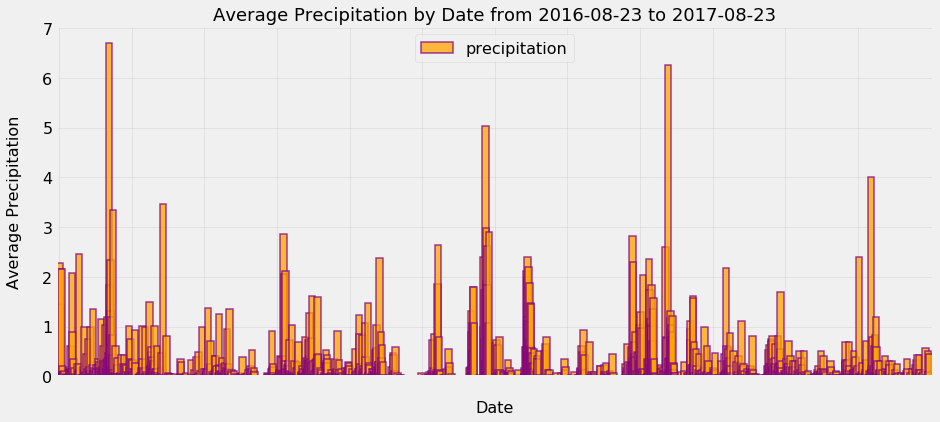

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.ticker as ticker

ax = df_q12.plot(kind='bar', width=15, figsize=(14,6), color = 'orange', alpha = 0.75, edgecolor='purple', linewidth=1.5)
ax.tick_params(axis='y', labelsize=16)
plt.locator_params(axis='x', nbins=12)
ax.xaxis.set_major_formatter(plt.NullFormatter())
# ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=6))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter(">%d<"))
# ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
# x_axis = ['2016-08-24', '2016-08-24', '2016-10-24', '2016-11-24', '2016-12-24', '2017-01-24', '2017-02-24', '2017-03-24', '2017-04-24', '2017-05-24', '2017-06-24', '2017-07-24']
# ticks = np.arange(len(x_axis))

# Set Labels & Title
plt.ylabel("Average Precipitation", labelpad=20, size=16)
plt.xlabel("Date", labelpad=20, size=16)
plt.title("Average Precipitation by Date from 2016-08-23 to 2017-08-23", size=18)
plt.grid(True, alpha = 0.4)
plt.legend(bbox_to_anchor=(.6,1), fontsize="16")
# plt.xticks(ticks, x_axis, rotation=10, fontsize = 14)


# Save Figure
plt.savefig("avr__precipitation_by_date.png")


# Show plot
plt.show()



In [68]:
# Optional: Other Recommended Analyses
# Looking for average precipitation for each month of the year
q13 = session.query(Measurement.date, Measurement.tobs).all()

df_q13 = pd.DataFrame(q13, columns=['date', 'temp'])
df_q13.head(10)

#efficient way to extract month from string format date
df_q13['month'] = pd.DatetimeIndex(df_q13['date']).month
df_q13 = df_q13.dropna()

import calendar
df_q13['month'] = df_q13['month'].apply(lambda x: calendar.month_abbr[x])
df_q13

df_q13.head()

,date,temp,month
0,2010-01-01,65.0,Jan
1,2010-01-02,63.0,Jan
2,2010-01-03,74.0,Jan
3,2010-01-04,76.0,Jan
4,2010-01-06,73.0,Jan


In [69]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.
df_q13 = df_q13.groupby(['month'], as_index=False)['temp'].mean()
df_q13['temp'] = round(df_q13['temp'], 2) 

df_q13

,month,temp
0,Apr,72.36
1,Aug,76.41
2,Dec,71.04
3,Feb,69.44
4,Jan,68.73
5,Jul,76.08
6,Jun,74.94
7,Mar,70.06
8,May,73.68
9,Nov,73.25


In [70]:
average_temperature_in_June = df_q13.iloc[6,  1]
average_temperature_in_June

74.94

In [72]:
# Interactive charts using plotly
import plotly.express as px
import plotly.graph_objects as go
df = df_q13


fig = px.bar(df, y= 'month' , x="temp", color="month",  orientation="h", hover_name='month',
             color_discrete_sequence=['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921', '#c3f921', '#94f921'],
             title="Average temperature for each month of the year"
            )

fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)



fig.show()

In [73]:
# Histogram with Plotly Express
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_q12, x="precipitation",
                   nbins=40,
                   title='Histogram of Precipitation from All Stations',
                   labels={'precipitation':'precipitation', }, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color = 'precipitation'
#                    color_discrete_sequence=['#0d0887', '#46039f', '#7201a8', '#9c179e', '#bd3786', '#d8576b', '#ed7953', '#fb9f3a', '#fdca26', '#f0f921', '#EB89B5'] # color of histogram bars
                   )


fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

               
fig.show()

![precipitation](Images/precipitation.png)

In [74]:
# Use Pandas to print the summary statistics for the precipitation data for a year.
df_q12.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [75]:
# Use Pandas to print the summary statistics for the precipitation data from '2010-01-01' to '2017-08-23'.
measurement_df[['prcp']].describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![describe](Images/describe.png)

In [76]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station.id).count()
stations_count

9

In [77]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
# active_stations  = pd.DataFrame(active_stations, columns=['station', 'counts'])
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# List the stations and the counts in descending order with names of stations.
active_df = combined_data.groupby(['station','name'])['name'].count()
active_df = pd.DataFrame(active_df)
active_df.rename(columns={'name': 'counts'}, inplace=True)
active_df = active_df.sort_values(by='counts', ascending=False)
active_df

,,counts
station,name,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00519397,"WAIKIKI 717.2, HI US",2724
USC00513117,"KANEOHE 838.1, HI US",2709
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
USC00517948,"PEARL CITY, HI US",1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [79]:
# The most active station
max_num = 0
for i in active_stations:
    if max_num < i[1]:
        max_num = i[1]
        print(f"Max active satation is: {i[0]} with {i[1]} counts")
    



Max active satation is: USC00519281 with 2772 counts


In [80]:
#  The min active station
min_num = 2773
for m in active_stations:
    
    if min_num > m[1]:
        min_num = m[1]
    
for i in active_stations:
    if min_num in i:
        print(f"Min active satation is: {m[0]} with {m[1]} counts")
        

Min active satation is: USC00518838 with 511 counts


In [81]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# ID for the most active station from the previous query
most_active__station = active_stations[0][0]

records = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == active_stations[0][0]).all()
print(f"The lowest temperature recorded : {records[0][0]}")
print("--------------------------------------------------")
print(f"The average temperature recorded : {round(records[0][1], 2)}")
print("--------------------------------------------------")
print(f"The highest temperature recorded : {records[0][2]}")

The lowest temperature recorded : 54.0
--------------------------------------------------
The average temperature recorded : 71.66
--------------------------------------------------
The highest temperature recorded : 85.0


In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_station = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active__station).\
                filter(Measurement.date >= date_365_days_ago).all()
temp_station_df = pd.DataFrame(temp_station, columns=['station', 'temperature'])
temp_station_df.head()
# temp_station_df.shape

,station,temperature
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


In [83]:
# Histogram with Plotly Express
import plotly.express as px
df = px.data.tips()
fig = px.histogram(temp_station_df, x="temperature",
                   nbins=20,
                   title='Histogram of the temperature from USC00519281 station',
                   labels={'temperature':'temperature', }, # can specify one label per df column
                   opacity=0.8,
                   log_y=True, # represent bars with log scale
                   color = 'temperature'
#                    color_discrete_sequence=['#ffe6e6', '#ffcccc', '#ffb3b3', '#ff9999', '#ff8080', '#ff6666',
#                                             '#ff4d4d', '#ff3333', '#ff1a1a', '#ff0000', '#e60000', '#cc0000',  
#                                             '#b30000', '#990000', '#800000', '#660000', '#4d0000', '#330000',
#                                             '#1a0000', '#000000', '#ff1a1a', '#ff0000', '#e60000', '#cc0000',] # color of histogram bars
                   )
                   

fig.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    ),
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

               
fig.show()

Minimum temperature : 59.0
Maximum temperature : 83.0
Total counts : 351
The average temperature for the year is: 73.1


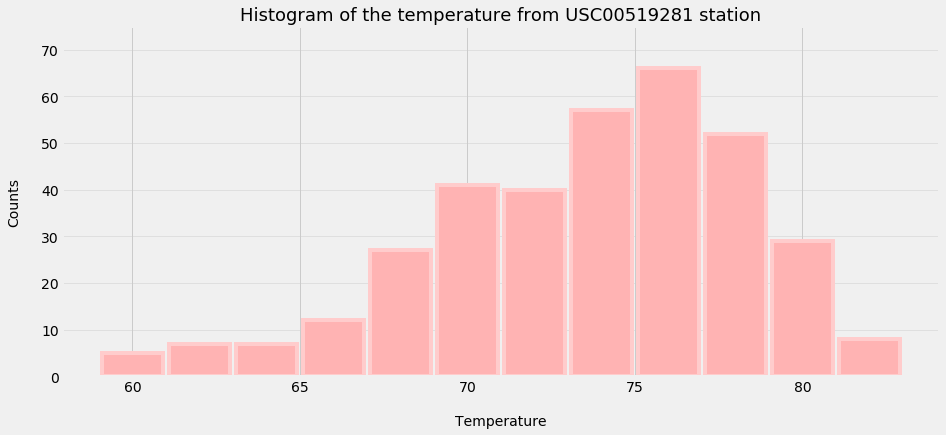

In [84]:
# An "interface" to matplotlib.axes.Axes.hist() method

ax = temp_station_df.hist(column='temperature', bins= 12, grid=True, figsize=(14,6), color='#ffb3b3', zorder=2, rwidth=0.9, edgecolor='#ffcccc', linewidth=4)

plt.grid(axis='y', alpha=0.45)
plt.ylabel('Counts', labelpad=20, size=14)
plt.xlabel('Temperature', labelpad=20, size=14)
plt.title('Histogram of the temperature from USC00519281 station',  size=18)

maxTemp = temp_station_df['temperature'].max()
minTemp = temp_station_df['temperature'].min()

# Set a clean upper y-axis limit.
plt.ylim(0 , 75)

print(f"Minimum temperature : {minTemp}")
print(f"Maximum temperature : {maxTemp}")
print(f"Total counts : {temp_station_df['temperature'].count()}")
print(f"The average temperature for the year is: {round(temp_station_df.temperature.mean(),2)}")

      
      

![precipitation](Images/station-histogram.png)

In [85]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [86]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation_start_day = '2017-06-15'
vacation_end_day = '2017-06-30'

vacation = calc_temps(vacation_start_day, vacation_end_day)
print(vacation)

[(71.0, 77.01980198019803, 82.0)]


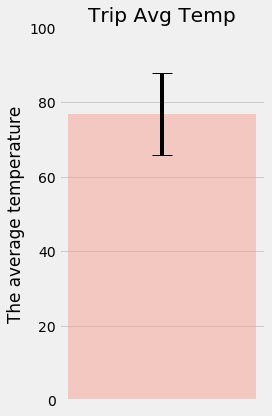

In [87]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
vacation__df = pd.DataFrame(vacation, columns=['TMIN', 'TAVE', 'TMAX'])

# Calculate the average, yerr and standard deviation
error = vacation__df['TMAX'] - vacation__df['TMIN']
CTEs = vacation__df['TAVE']
x_pos = ['Vac']

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, color = '#f6a192', ecolor='black', capsize=10)
ax.set_ylabel('The average temperature')
ax.set_xticks([])
ax.set_title('Trip Avg Temp')
ax.set_ylim(0,100)
ax.yaxis.grid(True)
fig = plt.gcf()
fig.set_size_inches(4, 6)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [88]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
vacation_start_day = '2017-06-15'
vacation_end_day = '2017-06-30'

sel =[Measurement.station, func.sum(Measurement.prcp), Station.name, Station.latitude, Station.longitude, Station.elevation]
total_rainfall = session.query(*sel).filter(Measurement.station == Station.station)\
                                    .filter(Measurement.date >= vacation_start_day)\
                                    .filter(Measurement.date <= vacation_end_day)\
                                    .group_by(Measurement.station)\
                                    .order_by(func.sum(Measurement.prcp).desc()).all()

print(total_rainfall)   
total_rainfall_df = pd.DataFrame(total_rainfall, columns = ['station', 'prcp_sum', 'name', 'latitude' , 'longitude', 'elevation'])  
total_rainfall_df

    

[('USC00516128', 5.479999999999999, 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4), ('USC00519281', 1.83, 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), ('USC00513117', 1.1900000000000004, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), ('USC00514830', 0.88, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), ('USC00519397', 0.21000000000000002, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), ('USC00519523', 0.13, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), ('USC00517948', 0.12, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]


,station,prcp_sum,name,latitude,longitude,elevation
0,USC00516128,5.48,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,1.83,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00513117,1.19,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,USC00514830,0.88,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00519397,0.21,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519523,0.13,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00517948,0.12,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [89]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [90]:
# Set the start and end date of the trip
vacation_start_day = '2017-06-15'
vacation_end_day = '2017-06-30'

# Create a range of dates
vacation_dates = session.query(Measurement.date)\
                              .filter(Measurement.date >= vacation_start_day)\
                              .filter(Measurement.date <= vacation_end_day)\
                              .group_by(Measurement.date).all()
vacation_dates
# List comprehension to get the elements in the tuple from the vacation_dates query 
trip_dates_list = [i[0] for i in vacation_dates]
trip_dates_list

# Stip off the year and save a list of %m-%d strings 
trip_dates_no_year= [i[5:] for i in trip_dates_list]
trip_dates_no_year

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(i) for i in trip_dates_no_year]
normals_1 = [i[0] for i in normals ]
normals_1

[(67.0, 75.40350877192982, 81.0),
 (69.0, 75.41379310344827, 81.0),
 (68.0, 74.59322033898304, 81.0),
 (69.0, 74.60344827586206, 80.0),
 (70.0, 75.44067796610169, 82.0),
 (68.0, 73.96491228070175, 85.0),
 (68.0, 74.75862068965517, 82.0),
 (69.0, 75.15789473684211, 81.0),
 (68.0, 74.54385964912281, 80.0),
 (68.0, 74.96428571428571, 84.0),
 (68.0, 74.10344827586206, 80.0),
 (67.0, 74.21428571428571, 82.0),
 (66.0, 75.01785714285714, 81.0),
 (69.0, 74.88679245283019, 80.0),
 (67.0, 74.91525423728814, 80.0),
 (67.0, 75.59615384615384, 81.0)]

In [91]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df= pd.DataFrame(normals_1, columns=['tmin', 'tavg', 'tmax'])
normals_df

my_vacation_range = pd.date_range(start='2020-06-15', end='2020-06-30')
my_vacation_range

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22',
               '2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26',
               '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', freq='D')

In [92]:
# Add trip_dates to Pandas DataFrame
normals_df['date']= my_vacation_range

# set the index equal to the date.
normals_df.set_index('date',inplace=True)
normals_df

,tmin,tavg,tmax
date,,,
2020-06-15,67.0,75.403509,81.0
2020-06-16,69.0,75.413793,81.0
2020-06-17,68.0,74.593220,81.0
2020-06-18,69.0,74.603448,80.0
2020-06-19,70.0,75.440678,82.0
2020-06-20,68.0,73.964912,85.0
2020-06-21,68.0,74.758621,82.0
2020-06-22,69.0,75.157895,81.0
2020-06-23,68.0,74.543860,80.0


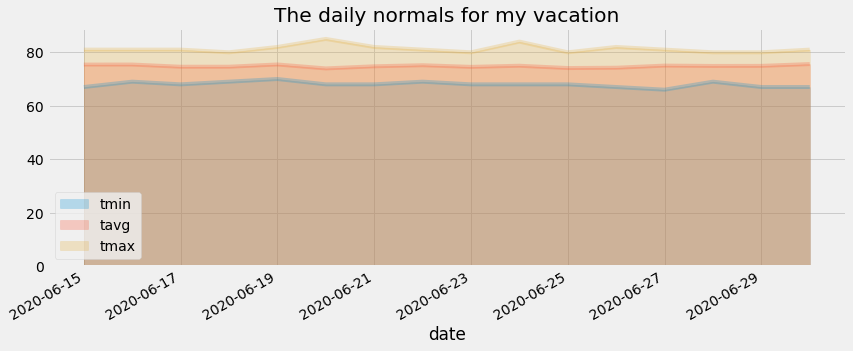

In [93]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot(kind='area',  alpha=.25, stacked=False, x_compat=True, title="The daily normals for my vacation")
plt.tight_layout()
ax.set_ylim(0,100)
ax.yaxis.grid(True)
fig = plt.gcf()
fig.set_size_inches(14, 6)

plt.savefig("dailyNormals.png")
plt.show()

In [94]:
normals_inte_df= pd.DataFrame(normals_1, columns=['tmin', 'tavg', 'tmax'])
normals_inte_df['date']= my_vacation_range
normals_inte_df

,tmin,tavg,tmax,date
0,67.0,75.403509,81.0,2020-06-15
1,69.0,75.413793,81.0,2020-06-16
2,68.0,74.593220,81.0,2020-06-17
3,69.0,74.603448,80.0,2020-06-18
4,70.0,75.440678,82.0,2020-06-19
5,68.0,73.964912,85.0,2020-06-20
6,68.0,74.758621,82.0,2020-06-21
7,69.0,75.157895,81.0,2020-06-22
8,68.0,74.543860,80.0,2020-06-23
9,68.0,74.964286,84.0,2020-06-24


In [95]:
x = normals_inte_df['date']

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=normals_inte_df['tmin'], name="Min",  fill='tozeroy')) # fill down to xaxis
fig.add_trace(go.Scatter(x=x, y=normals_inte_df['tavg'], name="Avg", fill='tozeroy')) # fill to trace0 y
fig.add_trace(go.Scatter(x=x, y=normals_inte_df['tmax'], name="Max", fill='tozeroy')) # fill down to xaxis

fig.update_layout(
    title="The daily normals for my vacation",
    xaxis_title="Vacation days",
    yaxis_title="Temp",
    yaxis=dict(
        type='linear',
        range=[1, 100],
        ticksuffix='F'),
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)


fig.show()